# Hands-on introduction to probabilities and testing for significant differences

###### Author and Instructor: __Matei Iordanescu__
Concepts:

 1) Probabilities and Random Variables
    - Concept 1: Real Life Examples
    - Concept 2: What is a Random Variable?
    - Concept 3: Vocabulary - Stochastic vs Deterministic
    - Concept 4: PDF vs CDF
 2) Normal Distributions
    - Concept 1: What is the Exponential Function?
    - Concept 2: The Normal Distribution
 3) How to compare if 2 probablity distributions are different?
    - Concept 1: Understanding the Kolmogorov-Smirnov (KS) test.
    - Concept 2: Applications of KS: how do you know if your medicine works?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from scipy.stats import norm

## 1: Probabilities and Random Variables

### Context:

Why should we care? A random variable is useful because it lets us represent uncertain outcomes with numbers so we can analyze them mathematically. For example, when flipping a coin or rolling a die, the result is random, but we can assign it a value to calculate things like averages or probabilities. This helps us understand patterns in data, make predictions, and compare results across different situations. Without random variables, it would be hard to apply math to uncertain events.

### Concept 1: Real Life Examples
Many phenomena in nature can not be described by just one number.
A random variable is a variable whose possible values are outcomes of a random process. It can be discrete (like dice or coin flips) or continuous (like temperature or time).

#### Examples:

##### What is the outcome of a coin flip? Is is heads or tails? (Discrete Binary Random Variable)

In [2]:
coin_flips = np.random.choice(['Heads', 'Tails'], size=1000)
print("Coin Flips:", coin_flips[:10])

Coin Flips: ['Tails' 'Tails' 'Heads' 'Tails' 'Heads' 'Tails' 'Heads' 'Tails' 'Tails'
 'Tails']


  
##### What face will you get if you roll a dice? (Discrete Uniform Random Variable)

In [3]:
dice_min_value = 0
dice_max_value =6
samples_count = 1000
dice_rolls = np.random.randint(dice_min_value, (dice_max_value+1), size=samples_count)
print("Dice Rolls:", dice_rolls[:10])

Dice Rolls: [1 2 5 0 2 4 5 1 0 0]



##### What is your body temperature if we measure it multiple times with a high precision thermometer? (Continuous Random Variable)

In [4]:
temps = np.random.normal(loc=70, scale=5, size=5000)
print(temps[:10])

[65.74345131 70.86225648 70.70486301 82.14482101 67.25247045 71.36135797
 62.47297546 63.22452602 71.59887986 74.29627469]



##### What will be the stopping angle of a spinning wheel? (Continuous Uniform Random Variable)

In [5]:
spinning_wheel_angle = np.random.uniform(0, 360, size=1000)
print(spinning_wheel_angle[:10])

[264.82778514 197.47910369  51.68833368 244.95683766 219.12372868
 231.83791584  46.93342918 295.1578998  102.35340529  17.85078938]


### Concept 2: So what is a Random Variable?
A random variable is a variable whose possible values are outcomes of a random process. It can be discrete (like dice or coin flips) or continuous (like temperature or spinner angle).

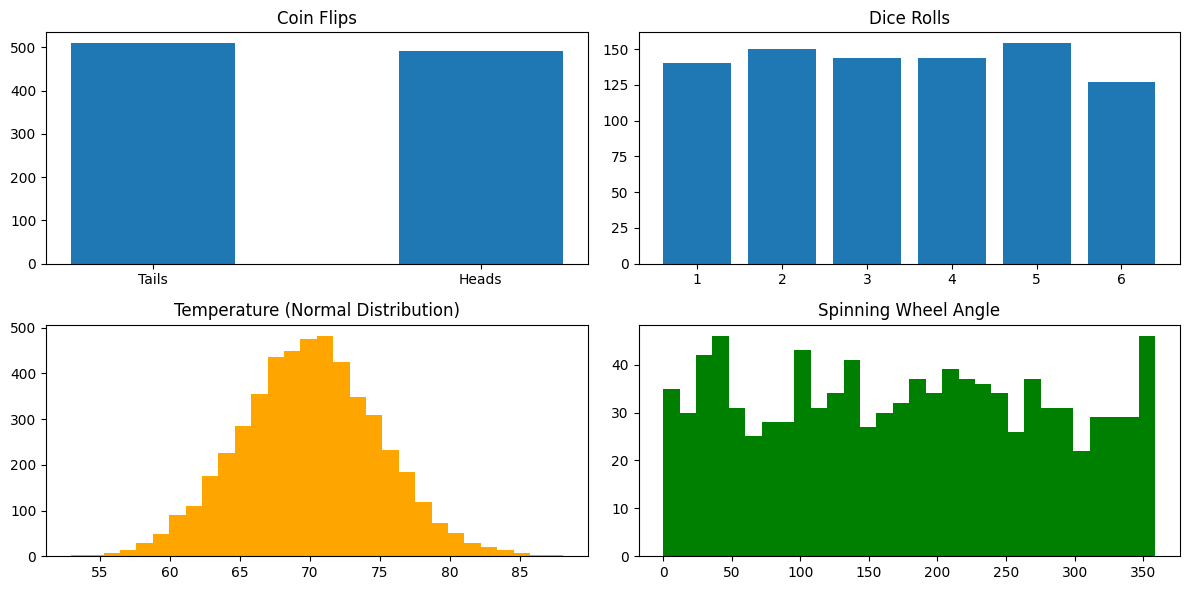

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist([1 if flip=='Heads' else 0 for flip in coin_flips], bins=2, rwidth=0.5)
plt.title("Coin Flips")
plt.xticks([0.25, 0.75], ['Tails', 'Heads'])
plt.subplot(2, 2, 2)
plt.hist(dice_rolls, bins=np.arange(1, 8)-0.5, rwidth=0.8)
plt.title("Dice Rolls")
plt.xticks(range(1, 7))
plt.subplot(2, 2, 3)
plt.hist(temps, bins=30, color='orange')
plt.title("Temperature (Normal Distribution)")
plt.subplot(2, 2, 4)
plt.hist(spinning_wheel_angle, bins=30, color='green')
plt.title("Spinning Wheel Angle")
plt.tight_layout()
plt.show()

### Concept 3: Vocabulary - Stochastic vs Deterministic
Stochastic: Has randomness (Ex: A coin flip, dice, etc.)  
Deterministic: Always the same result given the same input (Ex: A coin with 2 heads)

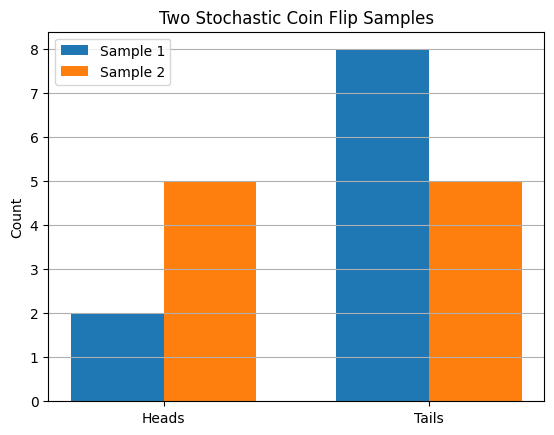

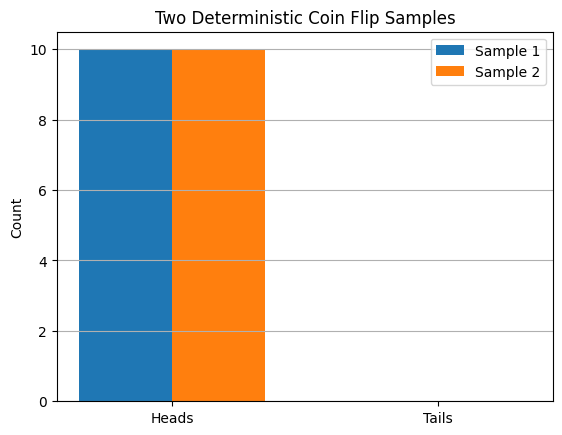

In [7]:
example1 = np.random.choice(['Heads', 'Tails'], size=10)
example2 = np.random.choice(['Heads', 'Tails'], size=10)

counts1 = {'Heads': np.sum(example1 == 'Heads'), 'Tails': np.sum(example1 == 'Tails')}
counts2 = {'Heads': np.sum(example2 == 'Heads'), 'Tails': np.sum(example2 == 'Tails')}

labels = ['Heads', 'Tails']
values1 = [counts1['Heads'], counts1['Tails']]
values2 = [counts2['Heads'], counts2['Tails']]
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, values1, width, label='Sample 1')
bars2 = ax.bar(x + width/2, values2, width, label='Sample 2')
ax.set_ylabel('Count')
ax.set_title('Two Stochastic Coin Flip Samples')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(axis='y')
plt.show()

example1 = np.random.choice(['Heads'], size=10)
example2 = np.random.choice(['Heads'], size=10)

counts1 = {'Heads': np.sum(example1 == 'Heads'), 'Tails': np.sum(example1 == 'Tails')}
counts2 = {'Heads': np.sum(example2 == 'Heads'), 'Tails': np.sum(example2 == 'Tails')}

labels = ['Heads', 'Tails']
values1 = [counts1['Heads'], counts1['Tails']]
values2 = [counts2['Heads'], counts2['Tails']]
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, values1, width, label='Sample 1')
bars2 = ax.bar(x + width/2, values2, width, label='Sample 2')
ax.set_ylabel('Count')
ax.set_title('Two Deterministic Coin Flip Samples')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(axis='y')
plt.show()

### Concept 4: PDF vs CDF
Probability distributions describe how likely different outcomes are in a random process. This is essentially a list of all possible values and the probbaility of each value.  
For example, for a coin flip, we have:  
 - heads: probability .5 (or for example .6 for a non fair coin)
 - tails: probability .5 (or .4 for the non fair coin)

For continuous variables, we cannot list all the values. So we use a function with the same domain as the random variable and whose area under the curve between points a and b in the domain is equal to the probablity of getting a value >= a and <b. This function is called a Probability Density Function (PDF).
  
A PDF :
 - must have a total area under the curve equal to 1
 - never dip below the x-axis since probabilities can’t be negative.

A Cumulative Distribution Function (CDF) is similar to a PDF but while the PDF shows the probability of getting a value in a certain range, the CDF is a function such that CDF(x) is equal to the probability of getting a value smaller than x. Consequently, it always increases and eventually reaches 1 when x is at the maximum value. A CDF at a certain value "a" is the area from the PDF from the minimum range value until the threshold "a".

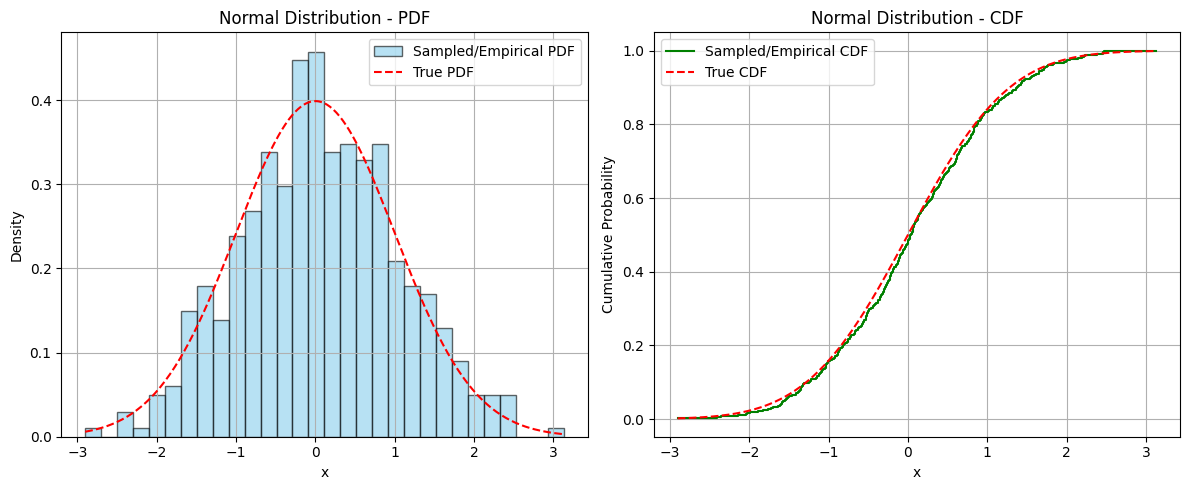

In [8]:
# Generate random samples from a normal distribution
mu, sigma = 0, 1
samples = np.random.normal(mu, sigma, size=500)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
count, bins, _ = plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Sampled/Empirical PDF')
x = np.linspace(min(bins), max(bins), 300)
plt.plot(x, norm.pdf(x, mu, sigma), 'r--', label='True PDF')
plt.title("Normal Distribution - PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

# CDF from samples
plt.subplot(1, 2, 2)
sorted_samples = np.sort(samples)
ecdf_y = np.arange(1, len(sorted_samples) + 1) / len(sorted_samples)
plt.step(sorted_samples, ecdf_y, label='Sampled/Empirical CDF', color='green', where='post')
plt.plot(x, norm.cdf(x, mu, sigma), 'r--', label='True CDF')
plt.title("Normal Distribution - CDF")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 2: Normal Distributions

### Concept 1: What is the Exponential Function?

An exponential function describes the value we get when we use a constant (called **base**) and raise it to a variable exponent, commonly written as __f(x)=a^x__  
  
In this equation, __a__ is the base and it can be any positive and rational number, such as 2 or 10, and __x__ is the input value that varies.  
   
Among all exponential functions, __f(x)=e^x__, which uses the base __e__ (approximately equal to 2.718, and is an irrational number like PI), is widely used in engineering and science:

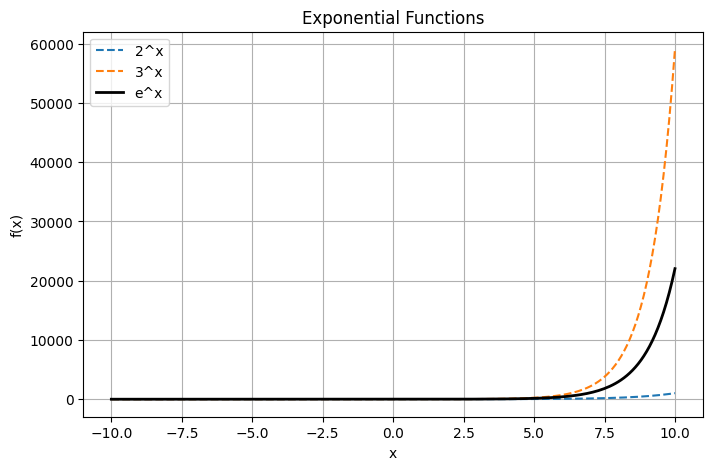

In [9]:
x = np.linspace(-10, 10, 200)
plt.figure(figsize=(8, 5))
plt.plot(x, np.power(2, x), label='2^x', linestyle='--')
plt.plot(x, np.power(3, x), label='3^x', linestyle='--')
plt.plot(x, np.exp(x), label='e^x', color='black', linewidth=2)

plt.title("Exponential Functions")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

### Concept 2: The Normal Distribution

The normal distribution is a bell-shaped curve that is described using the exponential function, specifically e^(0.5(−((x)^2))) multiplied by a constant (1/sqrt(2*Pi)).

The above equation describes the simplest normal distribution, with a mean of 0 and Standard deviation = 1. When the mean is not 0 and the standard deviation is not 1, the equation becomes:  
e^(−((x−μ)^2)/(2σ^2))  
(and the multiplication constant  being now(1/(sigma * sqrt(2*Pi))) ).  
 
The mean (μ) sets the center, and the standard deviation (σ) controls the spread; larger σ means a wider curve, smaller σ means a sharper peak.

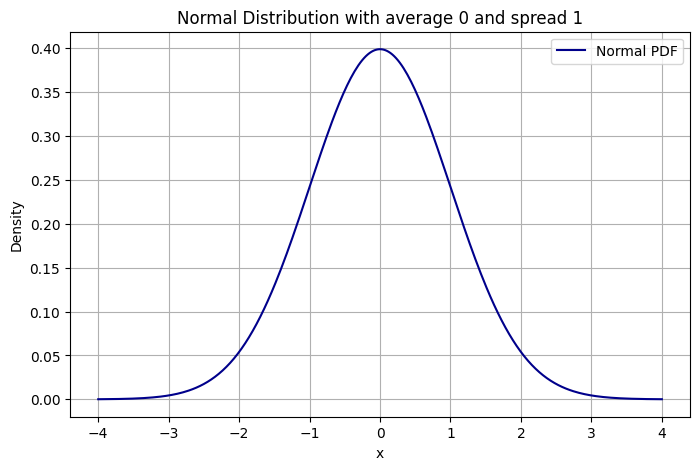

In [10]:
mu = 0
sigma = 1
x = np.linspace(-4, 4, 300)
normal_pdf = (1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-((x - mu)**2) / (2 * sigma**2))

plt.figure(figsize=(8, 5))
plt.plot(x, normal_pdf, label='Normal PDF', color='darkblue')
plt.title("Normal Distribution with average 0 and spread 1")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()


The reason for the multiplication constant in the normal distribution PDF, is to make sure its total area under the curve (AUC) is equal 1. this is needed since we know for sure the value will be in the range, and thus is a certain event with 100% probability.  

The shape of the Gaussian curve comes from the exponential part and this exponential term controls the curve’s shape, but by itself, its area under the curve is not 1. To fix that, we multiply it by the normalizing constant, which is: 1/sqrt(2πσ^2). This constant ensures the area under the entire curve is exactly 1, no matter what values of μ (mean) and σ (standard deviation) you use.  
  
  The value of the multiplication constant comes from solving the integral of the Gaussian function.

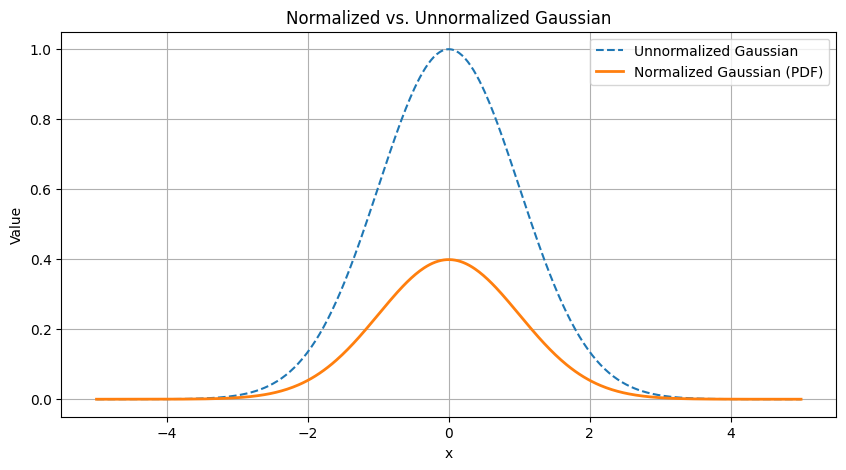

In [11]:
mu = 0
sigma = 1
x = np.linspace(-5, 5, 500)

# Unnormalized Gaussian
unnormalized = np.exp(-((x - mu)**2) / (2 * sigma**2))

# Normalized Gaussian (PDF)
normalized = (1 / (np.sqrt(2 * np.pi * sigma**2))) * unnormalized

plt.figure(figsize=(10, 5))
plt.plot(x, unnormalized, label='Unnormalized Gaussian', linestyle='--')
plt.plot(x, normalized, label='Normalized Gaussian (PDF)', linewidth=2)
plt.title("Normalized vs. Unnormalized Gaussian")
plt.xlabel("x")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

## 3: Kolmogorov–Smirnov

### Concept 1: What is the Kolmogorov-Smirnov test

The KS test compares the empirical cumulative distribution functions (ECDFs) of two samples. It calculates the maximum vertical distance between the ECDFs of those samples. A small distance suggests the samples are likely from the same distribution. A large distance means they might be from different ones.

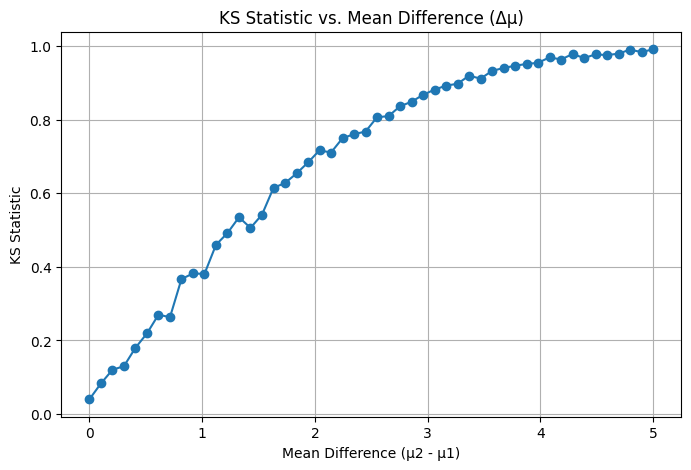

In [12]:
sample_size = 1000
mu_differences = np.linspace(0, 5, 50)  # Mean differences from 0 to 5
ks_statistics = []

# Generate and compare distributions
for delta in mu_differences:
    sample1 = np.random.normal(loc=0, scale=1, size=sample_size)
    sample2 = np.random.normal(loc=delta, scale=1, size=sample_size)
    ks_stat, _ = ks_2samp(sample1, sample2)
    ks_statistics.append(ks_stat)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(mu_differences, ks_statistics, marker='o')
plt.title("KS Statistic vs. Mean Difference (Δμ)")
plt.xlabel("Mean Difference (μ2 - μ1)")
plt.ylabel("KS Statistic")
plt.grid(True)
plt.show()

This code shows how the Kolmogorov-Smirnov (KS) statistic increases as the mean difference between two normal distributions grows. By simulating samples with progressively larger mean shifts, it demonstrates how the KS test detects greater divergence between distributions—highlighting its sensitivity to changes in central tendency.

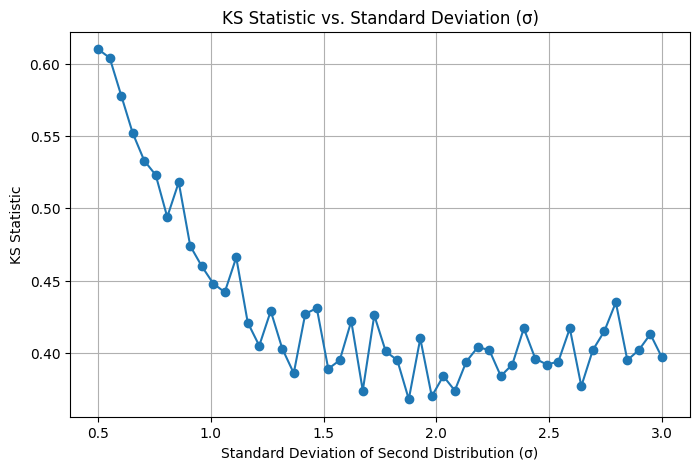

In [13]:
sample_size = 1000
sigma_values = np.linspace(0.5, 3.0, 50)  # Vary sigma from 0.5 to 3
ks_statistics = []

# Fixed mean for both distributions
mu_fixed1 = 1
mu_fixed2 = 2.2

# Generate and compare distributions
for sigma in sigma_values:
    sample1 = np.random.normal(loc=mu_fixed1, scale=1.0, size=sample_size)  # Standard normal
    sample2 = np.random.normal(loc=mu_fixed2, scale=sigma, size=sample_size)  # Varying sigma
    ks_stat, _ = ks_2samp(sample1, sample2)
    ks_statistics.append(ks_stat)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(sigma_values, ks_statistics, marker='o')
plt.title("KS Statistic vs. Standard Deviation (σ)")
plt.xlabel("Standard Deviation of Second Distribution (σ)")
plt.ylabel("KS Statistic")
plt.grid(True)
plt.show()

Even if the distributions are different (they have differnet μ-s), the KS statistic graph decreases as sigma increases from 0.5 to around σ = 1.5. That is becasue increasing the spread of second distribution makes it more similar to the first one. However, because the means are different, no matter how much the second distribution sigma increases, the KS never goes below .35, as expected.

### Concept 2: Applications of KS

The Kolmogorov-Smirnov (KS) test can be used in real life to evaluate treatment effects. For example, to test if a fever-reducing pill works, you could collect body temperature samples before and after taking the pill. The KS test compares these two distributions to see if they differ significantly. A large KS statistic would suggest the pill had a measurable effect. This approach is useful in medicine because the KS test doesn’t assume the data follows a specific distribution.

In [14]:
before_drug = np.random.normal(loc=98.6, scale=0.3, size=100)
after_drug = np.random.normal(loc=99.2, scale=0.3, size=100)

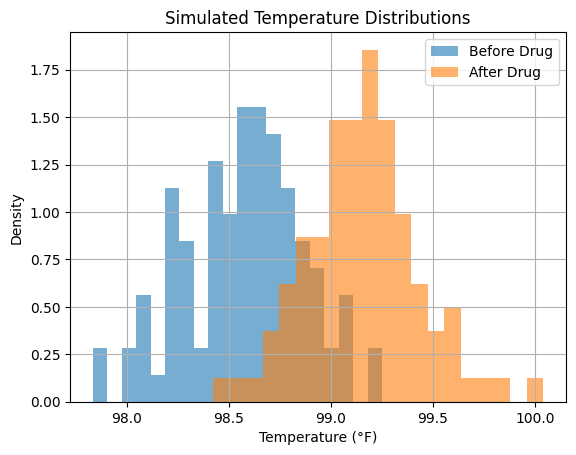

In [15]:
plt.hist(before_drug, bins=20, alpha=0.6, label='Before Drug', density=True)
plt.hist(after_drug, bins=20, alpha=0.6, label='After Drug', density=True)
plt.title("Simulated Temperature Distributions")
plt.xlabel("Temperature (°F)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

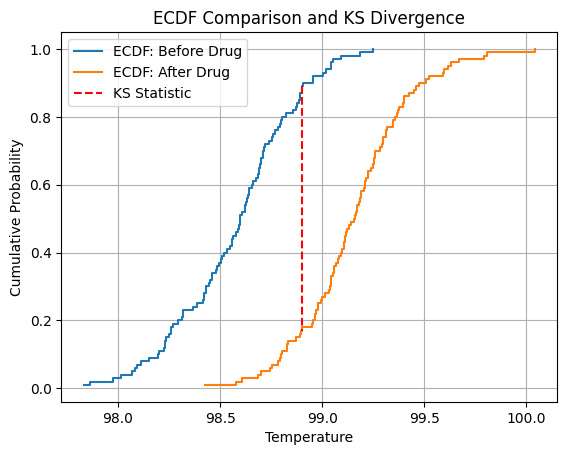

In [16]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

x1, y1 = ecdf(before_drug)
x2, y2 = ecdf(after_drug)

plt.step(x1, y1, label="ECDF: Before Drug", where='post')
plt.step(x2, y2, label="ECDF: After Drug", where='post')

# Compute vertical distance
all_x = np.sort(np.concatenate((before_drug, after_drug)))
F1 = np.searchsorted(np.sort(before_drug), all_x, side='right') / len(before_drug)
F2 = np.searchsorted(np.sort(after_drug), all_x, side='right') / len(after_drug)
diff = np.abs(F1 - F2)
max_idx = np.argmax(diff)

plt.vlines(all_x[max_idx], F1[max_idx], F2[max_idx], color='red', linestyle='--', label='KS Statistic')
plt.title("ECDF Comparison and KS Divergence")
plt.xlabel("Temperature")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()


Here, we compute the maximum vertical distance between the two ECDFs. This distance is the KS statistic. If it's small, the samples are similar. If it’s large, the samples are likely from different distributions.

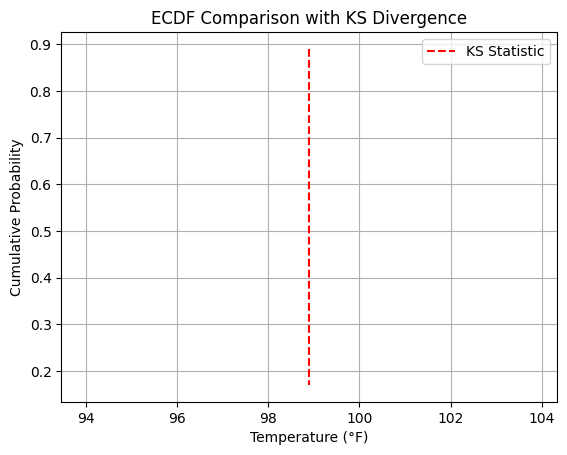

In [17]:
all_x = np.sort(np.concatenate((before_drug, after_drug)))
F1 = np.searchsorted(np.sort(before_drug), all_x, side='right') / len(before_drug)
F2 = np.searchsorted(np.sort(after_drug), all_x, side='right') / len(after_drug)
diff = np.abs(F1 - F2)
max_idx = np.argmax(diff)

plt.vlines(all_x[max_idx], F1[max_idx], F2[max_idx], color='red', linestyle='--', label='KS Statistic')
plt.title("ECDF Comparison with KS Divergence")
plt.xlabel("Temperature (°F)")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
stat, p_value = ks_2samp(before_drug, after_drug)
print(f"KS Statistic: {stat:.4f}, p-value: {p_value:.4f}")

KS Statistic: 0.7200, p-value: 0.0000


If the p-value is small (typically below 0.05), we reject the idea that the two samples come from the same distribution.